## ONLINE STORE SEGMENTATION

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

Attribute Information:

    InvoiceNo: A unique 6-digit integral number assigned to each transaction. If the code starts with the letter 'c', it indicates a cancellation.
    StockCode: A 5-digit integral number uniquely identifying each distinct product.
    Description: The name of the product (item).
    Quantity: The quantity of each product (item) per transaction.
    InvoiceDate: The date and time when the transaction was generated.
    UnitPrice: The unit price of the product in sterling (£).
    CustomerID: A unique 5-digit integral number assigned to each customer.
    Country: The name of the country where the customer resides.

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

* [Importing The Libraries.](#Importing-libraries)
* [Loading and Reading Dataset from the Archives](#Loading-and-Reading-Datasets)
* [Investigating the Dataset Information](#Investigating-the-Dataset-Information)
* [Data Transformation](#Data-Transformation)
* [Refined Data Representation and Feature Enhancement](#Refined-Data-Representation-and-Feature-Enhancement)
* [EDA](#EDA)
    * [Ordering Counties](#Ordering-countries)

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

<h2 id="Importing-libraries" style="text-align: center;">Importing libraries</h2>

In [1]:
import pandas as pd

import numpy as np

import scipy.stats as ss

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

import seaborn as sns

import my_func

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

<h2 id="Loading-and-Reading-Datasets" style="text-align: center;">Loading and Reading Dataset from the Archives</h2>

In [2]:
archive_path = 'archive.zip'
dataframes_in_zip = my_func.read_csv_files_from_zip(archive_path)
print(f'Amount of datasets: {len(dataframes_in_zip)}')
print(f'Files in zip: {list(dataframes_in_zip.keys())}')

Amount of datasets: 1
Files in zip: ['online_retail.csv']


**Ther is only one file *online_retail.csv***

In [3]:
df_online_retail = dataframes_in_zip['online_retail.csv']
origin_df = df_online_retail.copy()
df_online_retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  


<h2 id="Investigating-the-Dataset-Information" style="text-align: center;">Investigating the Dataset Information</h2>

In [4]:
my_func.review_dataframe(df_online_retail)

--------------------------------------------------------- DATA INFO ---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:541909
Columns:8
--------------------------------------------------------- DATA TYPES -------------------------------------------------

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

<h2 id="Data-Transformation" style="text-align: center;">Data Transformation</h2>

In [5]:
df_online_retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [6]:
#  Removing NaN's in Customer ID
print("Shape of data before removing NaN's CustomerID",df_online_retail.shape)
df_online_retail.dropna(subset="CustomerID",axis=0,inplace=True)
print("Shape of data after removing NaN's CustomerID",df_online_retail.shape)

Shape of data before removing NaN's CustomerID (541909, 8)
Shape of data after removing NaN's CustomerID (406829, 8)


In [7]:
#  Removing cacellation
df_online_retail = df_online_retail[~df_online_retail.InvoiceNo.str.contains('C', na=False)]

In [8]:
print("Missing values in each column after cleaning customerID :\n",df_online_retail.isnull().sum())

Missing values in each column after cleaning customerID :
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [9]:
# Removing duplicates (Values in all columns are identical)
print("Number of duplicates before cleaning:",df_online_retail.duplicated().sum())
df_online_retail = df_online_retail.drop_duplicates(keep="first")
print("Number of duplicates after cleaning:",df_online_retail.duplicated().sum())

Number of duplicates before cleaning: 5192
Number of duplicates after cleaning: 0


In [10]:
# Cheking for negative values
print("Negative value in Quantity:",(df_online_retail.Quantity<0).sum())
print("Negative value in UnitPrice:",(df_online_retail.UnitPrice<0).sum())


Negative value in Quantity: 0
Negative value in UnitPrice: 0


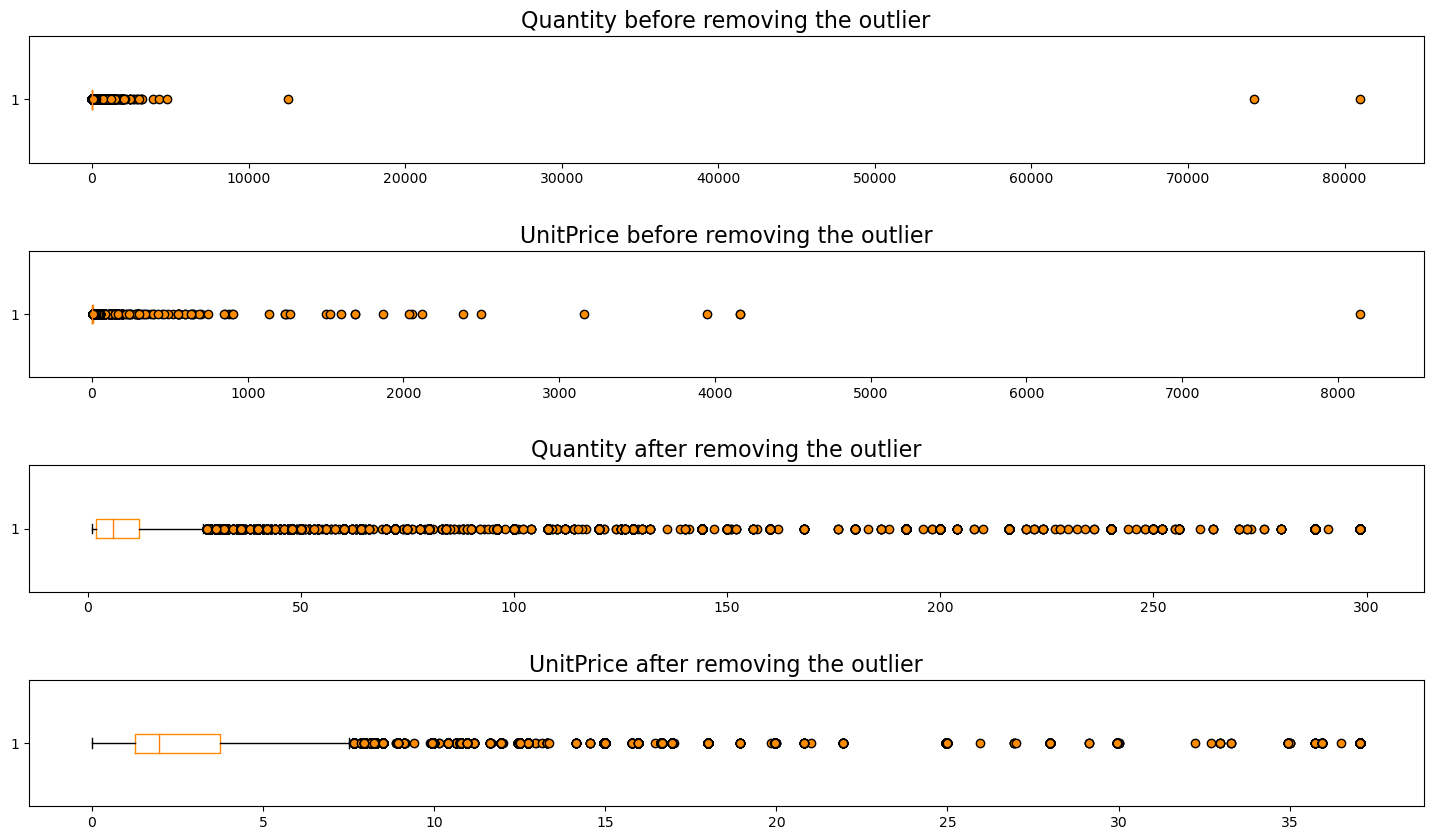

In [11]:
# Observing them before removing outliers.
f, ax = plt.subplots(nrows=4, ncols=1, figsize = (18,10))
# Adjust the vertical spacing between subplots
f.subplots_adjust(hspace=0.7)
col_list = ["Quantity","UnitPrice"]
# Plotting before and after removing outliers
for i, col in enumerate(col_list):
    
    # Plot before removing outliers
    ax[i].boxplot(df_online_retail[col], 
                  sym='o', 
                  vert=False, 
                  showfliers=True, 
                  boxprops=dict(color='#FF8C00'), 
                  flierprops=dict(markerfacecolor='#FF8C00'))
    ax[i].set_title(f'{col} before removing the outlier', fontsize=16)
    
    # Remove outliers and plot after removing outliers
    df_online_retail = my_func.replace_with_threshold(dataframe=df_online_retail, 
                                                      variable=col, 
                                                      percentile=0.01, 
                                                      coefficient=1.5)
    ax[i + 2].boxplot(df_online_retail[col], 
                      sym='o', 
                      vert=False, 
                      showfliers=True, 
                      boxprops=dict(color='#FF8C00'), 
                      flierprops=dict(markerfacecolor='#FF8C00'))
    ax[i + 2].set_title(f'{col} after removing the outlier', fontsize=16)

# Show the plot
plt.show()

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  



<h2 id="Refined-Data-Representation-and-Feature-Enhancement" style="text-align: center;">Refined Data Representation and Feature Enhancement</h2>

In [12]:
# Calculate the total order amount for each row (UnitPrice * Quantity)
df_online_retail['TotalPrice'] = df_online_retail['UnitPrice'] * df_online_retail['Quantity']

# # Determining order cancellation
# df_online_retail['Cancellation'] = df_online_retail['InvoiceNo'].str.contains('C', na=False)

# InvoiceDate to date type
df_online_retail['InvoiceDate'] = pd.to_datetime(df_online_retail['InvoiceDate'])
df_online_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalPrice            float64
dtype: object

In [13]:
df_online_retail

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS      12.0   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL        6.0   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL        4.0   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE       4.0   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT        3.0   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
...                    ...        ...         ...             ...         ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France       10.20  
541905 2011-12-09 12:50:00       2.10     12680.0          France       12.60  
541906 2011-12-09 12:50:00       4.15     12680.0          France       16.60  
541907 2011-12-09 12:50:00       4.15     12680.0          France       16.60  
541908 2011-12-09 12:50:00       4.95     12680.0          France       14.85  

[392732 rows x 9 columns]

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

<h2 id="EDA" style="text-align: center;">EDA</h2>

<h3 id="Ordering-countries" style="text-align: center;">Ordering countries</h3>

In [14]:
# Group the data by 'Country' and calculate the total order amount for each country
country_order_amount = df_online_retail.groupby('Country')['TotalPrice'] \
                                       .sum() \
                                       .reset_index()

# Calculate the percentage for each country
total_amount_sum = country_order_amount['TotalPrice'].sum()
country_order_amount['Percentage'] = (country_order_amount['TotalPrice'] / total_amount_sum) * 100

# Sort the DataFrame by 'Percentage' column in descending order
country_order_amount = country_order_amount.sort_values(by='Percentage', ascending=False) \
                                           .reset_index(drop=True)

# Threshold for "Other countries" category
threshold_percentage = 2.0

# Group small countries into "Other countries" category
other_countries_total_amount = country_order_amount[country_order_amount['Percentage'] < threshold_percentage]['TotalPrice'] \
                               .sum()
other_countries_percentage = (other_countries_total_amount / total_amount_sum) * 100

# Create a DataFrame for the "Other countries" category
other_countries_df = pd.DataFrame({'Country': ['Other countries'], 
                                   'TotalPrice': [other_countries_total_amount], 
                                   'Percentage': [other_countries_percentage]}
                                 )

# Combine the "Other countries" DataFrame with the main DataFrame, excluding small countries
filtered_country_order_amount = country_order_amount[country_order_amount['Percentage'] >= threshold_percentage]
country_order_amount = pd.concat([filtered_country_order_amount, other_countries_df]).reset_index(drop=True)

# Display 
country_order_amount

Country   TotalPrice  Percentage
0   United Kingdom  6656948.344   81.338041
1      Netherlands   271400.955    3.316117
2             EIRE   258772.090    3.161811
3          Germany   225534.030    2.755692
4           France   197296.335    2.410669
5  Other countries   574347.070    7.017670

In [15]:
# Create a bar chart
fig_bar = px.bar(country_order_amount, x='TotalPrice', y='Country',
             text='TotalPrice', orientation='h',
             title='Total Order Amount by Country',
             labels={'TotalPrice': 'Total Order Price (£)', 'Country': 'Country'},
             color='Country',
             color_discrete_sequence=px.colors.sequential.Oranges_r  # Use a custom color palette
            )

# Update the layout to display percentage labels inside the bars
fig_bar.update_traces(width=0.9, texttemplate='%{text:.0f}£', textposition='outside')

# Update the layout to change the size of the chart
fig_bar.update_layout(width=800, height=600)  

# Adjust the scale of the X-axis 
fig_bar.update_xaxes(range=[0, country_order_amount['TotalPrice'].max()*1.3])

# Show the plot
fig_bar.show()

**ADD PIE PLOT**

In [16]:
# Create a pie chart
fig_pie = px.pie(country_order_amount, values='Percentage', names='Country',
             title='Percentage of Total Order Price by Country',
             color_discrete_sequence=px.colors.sequential.Oranges_r  # Use a custom color palette
            )
# Update the layout to change the size of the chart
fig_pie.update_layout(width=600, height=600)  

# Show the plot
fig_pie.show()

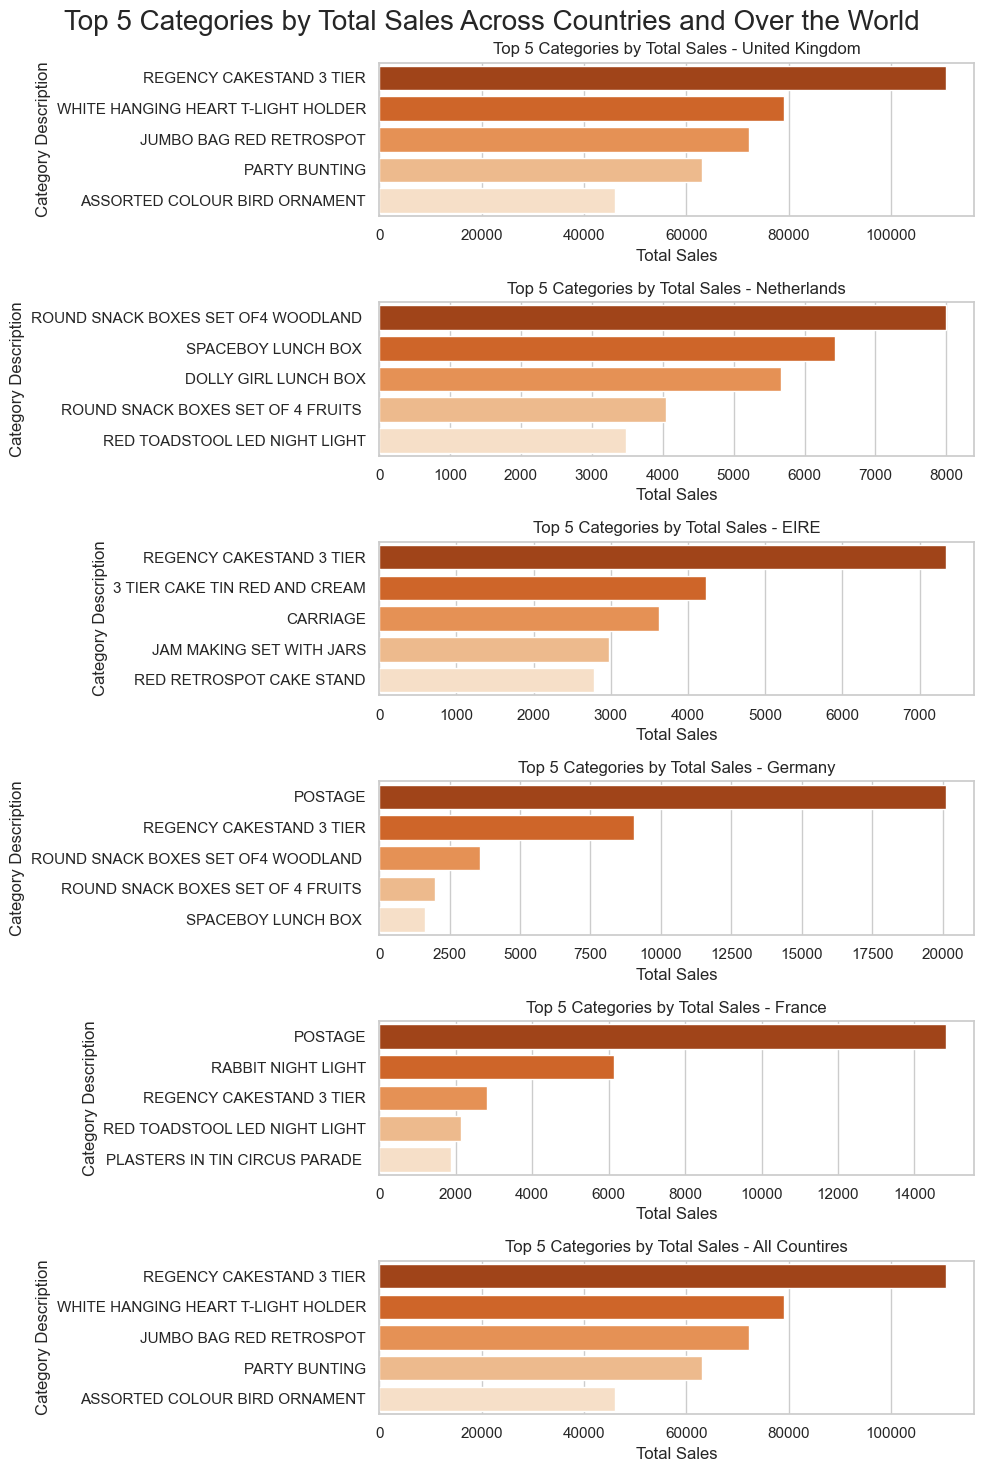

In [120]:
# Top 5 products across each country from Top 5 and all over the world

# List of countries and corresponding DataFrame names
df_UK = df_online_retail.query('Country == "United Kingdom"')
df_Netherlands = df_online_retail.query('Country == "Netherlands"')
df_EIRE = df_online_retail.query('Country == "EIRE"')
df_Germany = df_online_retail.query('Country == "Germany"')
df_France = df_online_retail.query('Country == "France"')

countries = ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'All Countires']
dataframes_countries = [df_UK, df_Netherlands, df_EIRE, df_Germany, df_France, df_online_retail]

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(10, 2.5 * len(countries)))

# Iterate through each country and create the bar plot
for i, (country, df_country) in enumerate(zip(countries, dataframes_countries)):
    total_sales_per_category = df_country \
        .groupby(['Country', 'Description'])['TotalPrice'] \
        .sum().reset_index() \
        .sort_values('TotalPrice', ascending=False)

    sns.barplot(data=total_sales_per_category.head(5),
                x='TotalPrice',
                y='Description',
                palette='Oranges_r',
                ax=axes[i])

    axes[i].set_title('Top 5 Categories by Total Sales - ' + country)
    axes[i].set_xlabel('Total Sales')
    axes[i].set_ylabel('Category Description')

# Добавить пространство между графиками
plt.subplots_adjust(hspace=0.5)  # Вы можете настроить величину пространства по вертикали

# Добавить верхний и нижний отступ
plt.subplots_adjust(top=2, bottom=1.9)  # Вы можете настроить величину отступов сверху и снизу

# Добавить общий заголовок для всего изображения
fig.suptitle('Top 5 Categories by Total Sales Across Countries and Over the World', fontsize=20)

plt.tight_layout()
plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

D:\Anaconda\AnacondaProgram\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

D:\Anaconda\AnacondaProgram\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



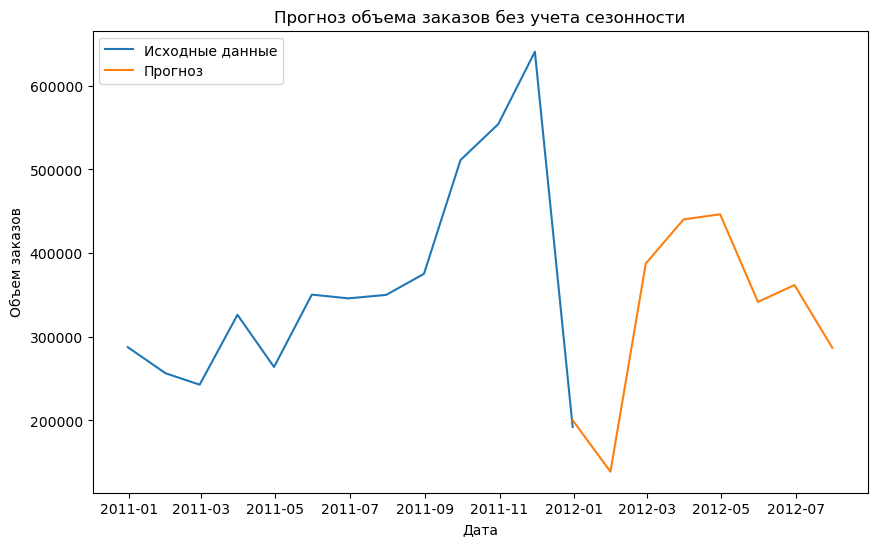

In [118]:
# Группировка данных по дате
df_grouped = df_online_retail.resample('M', on='InvoiceDate').sum(numeric_only=True)

p, d, q = 5, 0, 7
# Создание модели ARIMA
model = sm.tsa.ARIMA(df_grouped['Quantity'], order=(p, d, q))
results = model.fit()

# Прогнозирование будущих значений
n_periods = 8  # Количество периодов для прогноза
forecast = results.predict(start=len(df_grouped), end=len(df_grouped) + n_periods - 1, dynamic=False)

# Визуализация исходных данных и прогноза
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['Quantity'], label='Исходные данные')
plt.plot(pd.date_range(start=df_grouped.index[-1], periods=n_periods, freq='M'), forecast, label='Прогноз')
plt.legend(loc='upper left')
plt.xlabel('Дата')
plt.ylabel('Объем заказов')
plt.title('Прогноз объема заказов без учета сезонности')
plt.show()

Предупреждение UserWarning:
Это предупреждение "Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros." указывает на то, что модели ARIMA трудно оценить начальные параметры из-за недостаточного количества данных. Это предупреждение предполагает, что ваш набор данных может быть слишком мал для выбранного порядка модели (p, d, q). Вам может потребоваться пересмотреть порядок модели ARIMA или собрать больше данных, чтобы улучшить ее производительность.

Предупреждение ConvergenceWarning:
Предупреждение "Maximum Likelihood optimization failed to converge. Check mle_retvals" указывает на то, что оптимизация максимального правдоподобия, используемая в модели ARIMA, не сошлась. Это может быть вызвано различными причинами, такими как неправильные параметры модели или недостаточное количество данных. Важно проверить данные, убедиться, что они правильно предобработаны, и попробовать разные значения порядка модели (p, d, q), чтобы улучшить сходимость.

Для устранения предупреждения о сходимости вы можете попробовать следующее:

Измените параметры order=(p, d, q) на другие значения, чтобы увидеть, сходится ли модель для других комбинаций.
Проверьте, есть ли в вашем наборе данных пропущенные или NaN значения, и обработайте их соответствующим образом.
Убедитесь, что данные стационарны (имеют постоянное среднее и дисперсию) перед подгонкой модели ARIMA. Вам может потребоваться выполнить дифференцирование (d) или применить другие преобразования, чтобы достичь стационарности.
Следует помнить, что модели ARIMA чувствительны к качеству и количеству данных, и иногда другой подход к прогнозированию может быть более подходящим для вашего набора данных.



Для нахождения наиболее значимых тенденций или отличий в заказах в разных странах и идентификации факторов, которые могут влиять на поведение заказов, можно использовать следующие методы:

Сравнение статистических метрик:
Сравните основные статистические метрики (например, средние значения, медианы, стандартные отклонения) заказов для каждой страны. Выявление существенных различий в этих метриках может указывать на тенденции или отличия в поведении заказов в разных странах.

Визуализация данных:
Используйте графики и диаграммы для визуализации данных по различным странам. Например, столбчатые диаграммы могут помочь сравнить объемы заказов для каждой страны. Также можно построить графики временных рядов для выявления сезонных или временных тенденций.

Кластерный анализ:
Примените методы кластерного анализа для группировки стран с похожими характеристиками заказов. Кластерный анализ поможет идентифицировать сходство между странами и обнаружить возможные факторы, влияющие на поведение заказов в каждой группе.

Корреляционный анализ:
Проведите корреляционный анализ между различными переменными, такими как количество заказов, сумма заказов, цена товара и т.д., и странами. Это поможет понять, есть ли статистически значимая связь между этими переменными и странами.

Множественная регрессия:
Примените множественный анализ регрессии для определения влияния различных факторов на поведение заказов в разных странах. В этом случае страны будут выступать в качестве зависимой переменной, а факторы (например, цена товара, количество заказов и т.д.) - в качестве независимых переменных.

Анализ временных рядов:
Если у вас есть временные данные, можно применить анализ временных рядов, чтобы выявить сезонные или циклические паттерны в заказах для разных стран.

Дополнительные исследования:
При наличии других дополнительных данных о клиентах и продуктах, можно провести более глубокий анализ, чтобы определить, какие атрибуты клиентов или продуктов могут влиять на поведение заказов в разных странах.

Важно помнить, что результаты анализа могут быть предварительными, и для более точных выводов возможно потребуется дополнительное исследование и статистические методы. Также обратите внимание на размер выборки данных, так как он может повлиять на общие выводы.

In [110]:
# Шаг 1: Группировка данных по странам и агрегация информации
grouped_data = df_online_retail.groupby('Country').agg({
    'InvoiceNo': 'count',         # Общее количество заказов
    'Quantity': 'sum',            # Общее количество товаров
    'UnitPrice': 'mean',          # Средняя цена товаров
    'CustomerID': 'nunique',       # Количество уникальных клиентов
    'TotalPrice': 'mean'
}).rename(columns={
    'InvoiceNo': 'OrderNum',    
    'Quantity': 'SumAmount',       
    'UnitPrice': 'MeanUnitPrice',     
    'CustomerID': 'CustomerNum', 
    'TotalPrice': 'MeanOrderPrice'
})
grouped_data

OrderNum  SumAmount  MeanUnitPrice  CustomerNum  \
Country                                                                 
Australia                 1184    78746.5       2.781090            9   
Austria                    398     4881.0       4.160000           11   
Bahrain                     17      260.0       4.644118            2   
Belgium                   2031    23237.0       3.628735           25   
Brazil                      32      356.0       4.456250            1   
Canada                     151     2557.5       2.627152            4   
Channel Islands            747     9376.5       4.140884            9   
Cyprus                     603     6340.0       4.252156            8   
Czech Republic              25      671.0       3.013200            1   
Denmark                    380     8235.0       3.146184            9   
EIRE                      7228   137216.5       3.791507            3   
European Community          60      499.0       4.830000            1   
Finland                    685    10704.0       4.798540           12   
France                    8327   110473.5       3.230713           87   
Germany                   9027   118719.5       3.389293           94   
Greece                     145     1557.0       4.321241            4   
Iceland                    182     2458.0       2.644011            1   
Israel                     245     4043.0       3.194735            3   
Italy                      758     8112.0       4.347863           14   
Japan                      321    19066.5       2.047383            8   
Lebanon                     45      386.0       5.387556            1   
Lithuania                   35      652.0       2.841143            1   
Malta                      112      970.0       4.565804            2   
Netherlands               2363   189401.0       2.560491            9   
Norway                    1072    19338.0       3.910905           10   
Poland                     330     3684.0       4.120061            6   
Portugal                  1453    16095.0       3.191569           19   
RSA                         58      352.0       4.277586            1   
Saudi Arabia                 9       80.0       2.351111            1   
Singapore                  222     5241.0       4.210045            1   
Spain                     2480    27636.5       3.814419           30   
Sweden                     450    31066.5       3.639622            8   
Switzerland               1842    30083.0       3.420776           21   
USA                        179     2458.0       2.308939            4   
United Arab Emirates        68      982.0       3.374265            2   
United Kingdom          349227  3816673.0       2.827610         3921   
Unspecified                241     1785.0       3.219710            4   

                      MeanOrderPrice  
Country                               
Australia                 112.907525  
Austria                    25.366281  
Bahrain                    32.258824  
Belgium                    20.282349  
Brazil                     35.737500  
Canada                     19.434901  
Channel Islands            26.874505  
Cyprus                     20.454461  
Czech Republic             32.952000  
Denmark                    49.882474  
EIRE                       35.801341  
European Community         21.670833  
Finland                    31.835533  
France                     23.693567  
Germany                    24.984384  
Greece                     32.290000  
Iceland                    23.681319  
Israel                     28.865388  
Italy                      22.675475  
Japan                      89.602040  
Lebanon                    37.641778  
Lithuania                  47.458857  
Malta                      22.458125  
Netherlands               114.854403  
Norway                     32.237631  
Poland                     22.137273  
Portugal                   20.218004  
RSA                        17.281207  
Saud

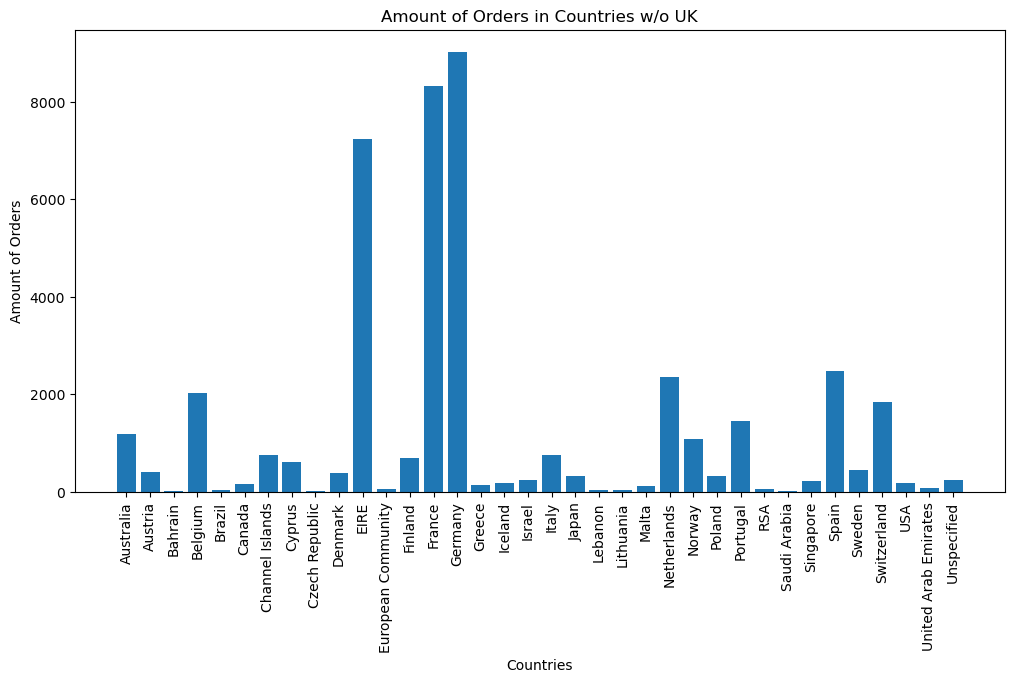

In [109]:
# Шаг 2: Визуализация данных
# Пример: столбчатая диаграмма количества заказов по странам
plt.figure(figsize=(12, 6))
plt.bar(grouped_data[grouped_data['Country'] != 'United Kingdom']['Country'], 
        grouped_data[grouped_data['Country'] != 'United Kingdom']['OrderNum']
       )
plt.xlabel('Countries')
plt.ylabel('Amount of Orders')
plt.title('Amount of Orders in Countries w/o UK')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Шаг 3: Сравнение статистических метрик
# Пример: сравнение средних цен заказов по странам
mean_prices_by_country = df_online_retail.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False)
print(mean_prices_by_country)

In [116]:
# Шаг 4: Проверка гипотез

country_A_data = df_online_retail[df_online_retail['Country'] == 'France']['Quantity']
country_B_data = df_online_retail[df_online_retail['Country'] == 'United Kingdom']['Quantity']

t_stat, p_value = ss.ttest_ind(country_A_data, country_B_data)
print('T-статистика:', t_stat)
print('P-значение:', p_value)

T-статистика: 8.922936875363073
P-значение: 4.561508868595892e-19


### Corellation matrix

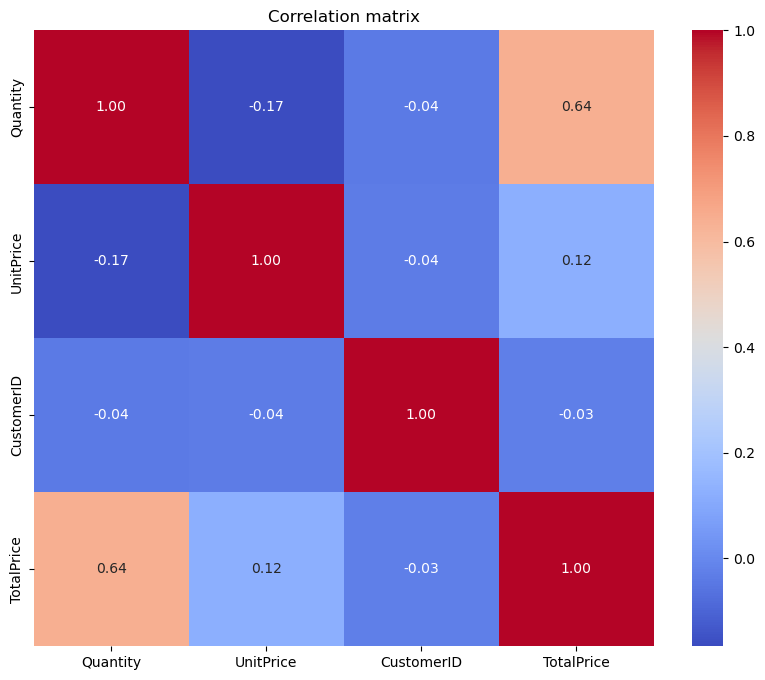

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_online_retail[['Quantity','UnitPrice','CustomerID', 'TotalPrice']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

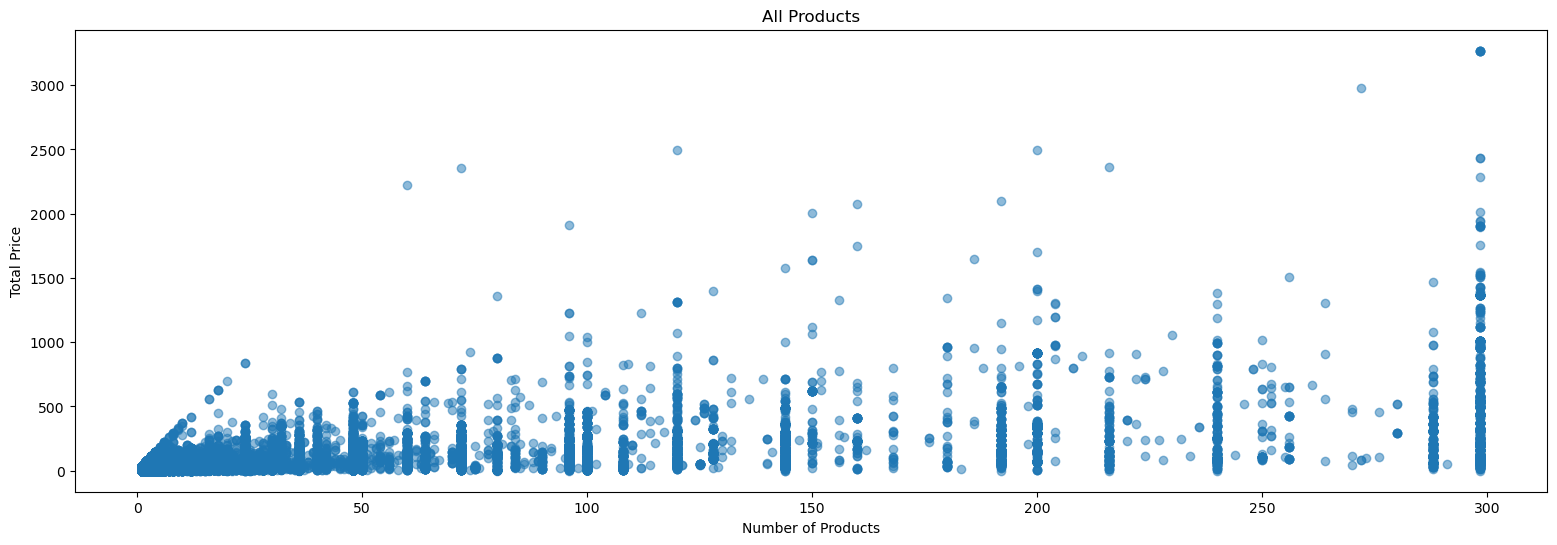

In [30]:
# Размеры графика
plt.figure(figsize=(19, 6))

# Строим диаграмму рассеяния
plt.scatter(df_online_retail['Quantity'], df_online_retail['TotalPrice'], alpha=0.5)  # Параметр alpha задает прозрачность точек
# Добавляем подписи осей и заголовок
plt.xlabel('Number of Products')
plt.ylabel('Total Price')
plt.title('All Products')




# Показываем график
plt.show()




~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Linear regression model

In [38]:
import statsmodels.api as sm
X = df_online_retail['Country']  # Независимая переменная (предиктор)
y = df_online_retail['TotalPrice']  # Зависимая переменная (целевая переменная)

# Добавляем константу для модели (y = b0 + b1*X)
X = sm.add_constant(X)

# Создаем и обучаем модель линейной регрессии
model = sm.OLS(y, X).fit()

# Получаем результаты регрессионного анализа
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const      float64
Country     object
dtype: object. The data was
0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 392732, dtype: float64
and
         const         Country
0         1.0  United Kingdom
1         1.0  United Kingdom
2         1.0  United Kingdom
3         1.0  United Kingdom
4         1.0  United Kingdom
...       ...             ...
541904    1.0          France
541905    1.0          France
541906    1.0          France
541907    1.0          France
541908    1.0          France

[392732 rows x 2 columns]
before. After,
[15.3  20.34 22.   ... 16.6  16.6  14.85]
[[1.0 'United Kingdom']
 [1.0 'United Kingdom']
 [1.0 'United Kingdom']
 ...
 [1.0 'France']
 [1.0 'France']
 [1.0 'France']].

In [ ]:
plt.scatter(df_online_retail['Quantity'], df_online_retail['TotalPrice'], alpha=0.5)
plt.plot(df_online_retail['Quantity'], model.predict(X), color='red')
plt.xlabel('Количество товаров')
plt.ylabel('Общая стоимость')
plt.title('Линейная регрессия: Количество товаров vs Общая стоимость')
plt.show()


R-квадрат (R-squared): Значение R-квадрат (R-squared) равно 0.416, что означает, что около 41.6% дисперсии зависимой переменной (TotalPrice) объясняется независимой переменной (Quantity). Это показывает относительную силу связи между этими переменными. Оставшиеся 58.4% дисперсии объясняются другими факторами, которые не учтены в данной модели.

Коэффициенты: В уравнении регрессии приведены значения коэффициентов. Константа (const) имеет значение 5.2066, что означает ожидаемое значение зависимой переменной при Quantity = 0 (хотя в данной задаче значение Quantity не может быть равно нулю). Коэффициент Quantity равен 1.3078, что говорит о том, что с увеличением Quantity на единицу, TotalPrice ожидается увеличиться на 1.3078 единиц.

P-значения (P>|t|): P-значения для коэффициентов показывают статистическую значимость связи между каждым из коэффициентов и зависимой переменной. Оба коэффициента имеют P-значение равное нулю, что говорит о том, что связь статистически значима.

F-статистика и Prob (F-statistic): F-статистика равна 2.801e+05, а Prob (F-statistic) равно нулю, что указывает на общую статистическую значимость модели регрессии в целом.

Omnibus, Durbin-Watson, Jarque-Bera и Kurtosis: Это статистические показатели, которые помогают оценить адекватность модели. Высокое значение Kurtosis может указывать на аномалии в данных.

Cond. No.: Значение Cond. No. отражает мультиколлинеарность (наличие корреляции между независимыми переменными). Здесь значение Cond. No. равно 31.5, что обычно не является проблемой.

Общий вывод: В данном анализе мы построили линейную регрессию для объяснения зависимой переменной TotalPrice на основе независимой переменной Quantity. Модель имеет статистически значимую связь, но R-квадрат показывает, что модель объясняет только часть дисперсии. Для повышения объяснительной способности модели можно попробовать добавить дополнительные независимые переменные или использовать другую функциональную форму регрессии, если это соответствует характеру данных. Также стоит проверить предпосылки линейной регрессии, такие как нормальность остатков и гомоскедастичность.

### Conclusion of Linear Regression Model
1. R-squared: The value of R-squared is 0.416, which means that about 41.6% of the variance of the dependent variable (TotalPrice) is explained by the independent variable (Quantity). This shows the relative strength of the relationship between these variables. The remaining 58.4% of the variance is explained by other factors that are not accounted for in this model.

2. Coefficients: The regression equation shows the values of the coefficients. The constant (const) has a value of 5.2066, which means the expected value of the dependent variable when Quantity = 0 (although Quantity cannot be zero in this problem). The Quantity coefficient is 1.3078, indicating that as Quantity increases by one unit, TotalPrice is expected to increase by 1.3078 units.

3. P-values (P>|t|): P-values for the coefficients show the statistical significance of the relationship between each of the coefficients and the dependent variable. Both coefficients have P-values equal to zero, indicating that the relationship is statistically significant.

4. F-statistic and Prob (F-statistic): F-statistic is equal to 2.801e+05 and Prob (F-statistic) is equal to zero, indicating the overall statistical significance of the regression model as a whole.

5. Omnibus, Durbin-Watson, Jarque-Bera and Kurtosis: These are statistical measures that help to assess the adequacy of the model. A high value of Kurtosis may indicate anomalies in the data.

6. Cond. No.: The value of Cond. No. reflects multicollinearity (presence of correlation between independent variables). Here, the value of Cond. No. is 31.5, which is usually not a problem.

7. Overall conclusion: In this analysis, we have constructed a linear regression to explain the dependent variable TotalPrice based on the independent variable Quantity. The model has a statistically significant relationship, but the R-square shows that the model explains only a portion of the variance. To increase the explanatory power of the model, you could try adding additional independent variables or using a different functional form of regression if it fits the nature of the data. It is also worth checking the assumptions of linear regression, such as normality of residuals and homoscedasticity.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

<div style="border-bottom: 15px dashed darkorange; width: 100%;"></div>  

In [38]:
import pandas as pd
import numpy as np
import altair as alt
from altair_saver import save

# Создание случайных данных для примера
np.random.seed(42)
countries = ['USA', 'Canada', 'Germany', 'France', 'UK']
total_prices = np.random.randint(100, 1000, size=len(countries))
percentages = np.random.uniform(0, 100, size=len(countries))

country_order_amount = pd.DataFrame({
    'Country': countries,
    'TotalPrice': total_prices,
    'Percentage': percentages
})

# Интерактивная круговая диаграмма
pie_chart = alt.Chart(country_order_amount).mark_circle().encode(
    alt.X('Country:N'),
    alt.Y('Percentage:Q'),
    size='TotalPrice:Q',
    color='Country:N',
    tooltip=['Country', 'Percentage', 'TotalPrice']
).properties(
    width=300,
    height=300
)

# Интерактивная столбчатая диаграмма
bar_chart = alt.Chart(country_order_amount).mark_bar().encode(
    alt.X('Country:N'),
    alt.Y('TotalPrice:Q'),
    color='Country:N',
    tooltip=['Country', 'TotalPrice']
).properties(
    width=300,
    height=300
)

# Объединение двух графиков
charts = pie_chart | bar_chart

# Сохранение и отображение графиков в виде HTML
output_file = "interactive_charts.html"
save(charts, output_file)


In [54]:
?? px.update_traces()

Object ` px.update_traces()` not found.


In [12]:
df_online_retail['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [13]:
orders_per_customer = df_online_retail.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Rename the column to 'OrderCount' for clarity
orders_per_customer.rename(columns={'InvoiceNo': 'OrderCount'}, inplace=True)

# Sort the DataFrame by 'OrderCount'
orders_per_customer.sort_values('OrderCount', inplace=True, ascending=False)
orders_per_customer

CustomerID  OrderCount
1895     14911.0         248
330      12748.0         224
4042     17841.0         169
1674     14606.0         128
568      13089.0         118
...          ...         ...
1141     13877.0           1
2997     16400.0           1
1142     13878.0           1
1149     13886.0           1
990      13670.0           1

[4372 rows x 2 columns]

In [129]:
# Изменяемость цен
df_online_retail.groupby('Description').agg({'UnitPrice': 'nunique'}).sort_values(by='UnitPrice', ascending=False).head(10)

UnitPrice
Description                                   
Manual                                      59
POSTAGE                                     18
COOK WITH WINE METAL SIGN                   12
WOOD BLACK BOARD ANT WHITE FINISH           10
GIN + TONIC DIET METAL SIGN                 10
HAND OVER THE CHOCOLATE   SIGN               9
SET OF TEA COFFEE SUGAR TINS PANTRY          8
DOORMAT UNION FLAG                           8
PACK OF 12 LONDON TISSUES                    8
MEMO BOARD RETROSPOT  DESIGN                 8